In [48]:
!pip install -q sentence-transformers numpy pandas

In [49]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [50]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"harshiniryali","key":"575d0bfc943cb6254aff097326508a96"}'}

In [51]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [52]:
!kaggle datasets download -d tunguz/big-five-personality-test --force
!unzip -oq big-five-personality-test.zip -d bigfive


Dataset URL: https://www.kaggle.com/datasets/tunguz/big-five-personality-test
License(s): other
 93% 148M/159M [00:00<00:00, 127MB/s]
100% 159M/159M [00:01<00:00, 150MB/s]


In [53]:
!find bigfive -name "*.csv"

bigfive/IPIP-FFM-data-8Nov2018/data-final.csv


In [54]:
DATA_PATH= "bigfive/IPIP-FFM-data-8Nov2018/data-final.csv"

In [55]:
df= pd.read_csv(DATA_PATH, sep='\t')
print("Full Dataset Shape:", df.shape)


trait_columns = [
    col for col in df.columns
    if col.startswith(('EXT', 'EST', 'AGR', 'CSN', 'OPN'))
    and not col.endswith('_E')
]


df_traits = df[trait_columns]

print("Filtered Trait Dataset Shape:", df_traits.shape)


pd.set_option('display.max_columns', None)
df_traits.head()

Full Dataset Shape: (1015341, 110)
Filtered Trait Dataset Shape: (1015341, 50)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [56]:
# ================= TRAIT STRUCTURE =================

trait_items = {
    'EXT': [f'EXT{i}' for i in range(1, 11)],
    'EST': [f'EST{i}' for i in range(1, 11)],
    'AGR': [f'AGR{i}' for i in range(1, 11)],
    'CSN': [f'CSN{i}' for i in range(1, 11)],
    'OPN': [f'OPN{i}' for i in range(1, 11)],
}

all_items = [item for sublist in trait_items.values() for item in sublist]

In [57]:
# ================= DATA CLEANING =================

df_clean = df[all_items].dropna()
print("Clean Dataset Shape:", df_clean.shape)

Clean Dataset Shape: (1013558, 50)


In [59]:
!pip install -q xgboost

In [64]:
# ================= 3-CLASS LABEL CREATION (EST REVERSED ONCE) =================

df_ml = df_clean.copy()

for trait, items in trait_items.items():

    # Reverse EST (Neuroticism → Emotional Stability)
    if trait == "EST":
        df_ml[items] = 6 - df_ml[items]

    trait_mean = df_ml[items].mean(axis=1)

    low_threshold = trait_mean.quantile(0.33)
    high_threshold = trait_mean.quantile(0.66)

    def categorize(score):
        if score <= low_threshold:
            return 0
        elif score <= high_threshold:
            return 1
        else:
            return 2

    df_ml[trait + "_label"] = trait_mean.apply(categorize)

print("Labels created with EST reversed (correct).")

Labels created with EST reversed (correct).


In [71]:
# ================= XGBOOST TRAINING (CORRECTED EST LOGIC) =================

xgb_models = {}
xgb_results = {}

for trait, items in trait_items.items():

    print(f"Training XGBoost for {trait}...")

    X = df_clean[items].copy()   # IMPORTANT: Use ORIGINAL data

    # Reverse EST for training
    if trait == "EST":
        X[items] = 6 - X[items]

    y = df_ml[trait + "_label"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    model = XGBClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.08,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        objective='multi:softprob',
        num_class=3,
        eval_metric='mlogloss',
        tree_method='hist'
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    xgb_results[trait] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }

    xgb_models[trait] = model

print("Training completed correctly.")

Training XGBoost for EXT...
Training XGBoost for EST...
Training XGBoost for AGR...
Training XGBoost for CSN...
Training XGBoost for OPN...
Training completed correctly.


In [72]:
print("\n3-Class XGBoost Evaluation Metrics:\n")

for trait, metrics in xgb_results.items():
    print(trait + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 40)


3-Class XGBoost Evaluation Metrics:

EXT:
  Accuracy: 0.9596
  Precision: 0.9602
  Recall: 0.9596
  F1-Score: 0.9596
----------------------------------------
EST:
  Accuracy: 0.9741
  Precision: 0.9744
  Recall: 0.9741
  F1-Score: 0.9742
----------------------------------------
AGR:
  Accuracy: 0.9590
  Precision: 0.9593
  Recall: 0.9590
  F1-Score: 0.9591
----------------------------------------
CSN:
  Accuracy: 0.9642
  Precision: 0.9642
  Recall: 0.9642
  F1-Score: 0.9641
----------------------------------------
OPN:
  Accuracy: 0.9653
  Precision: 0.9658
  Recall: 0.9653
  F1-Score: 0.9655
----------------------------------------


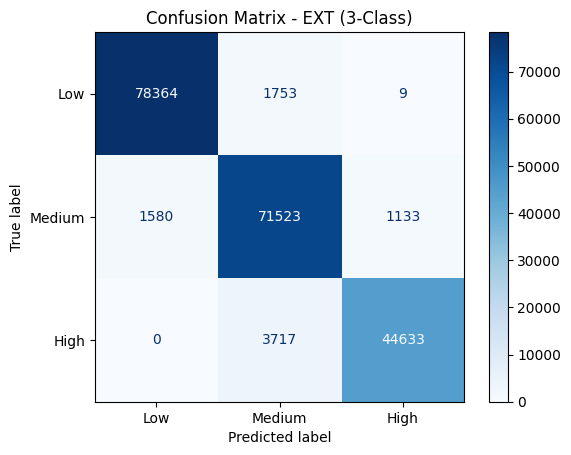

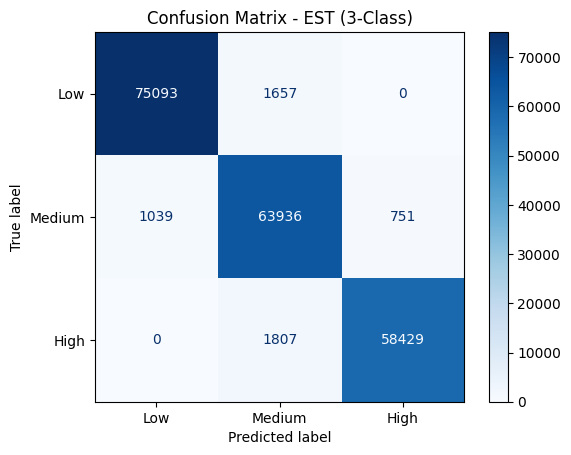

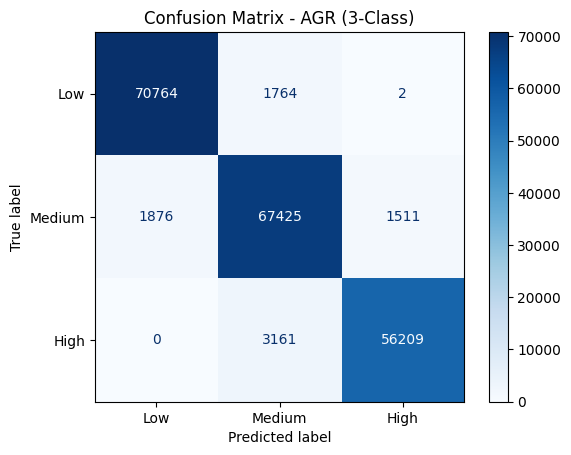

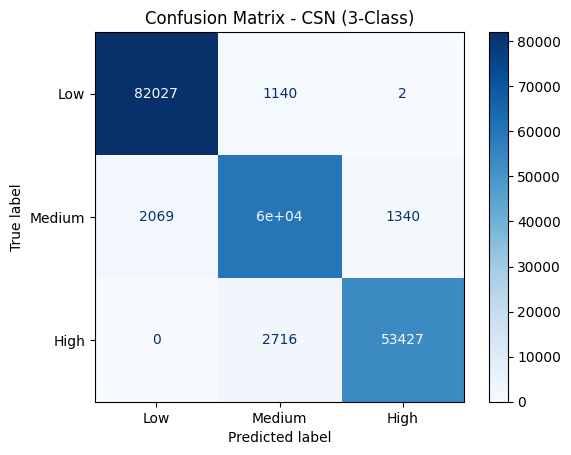

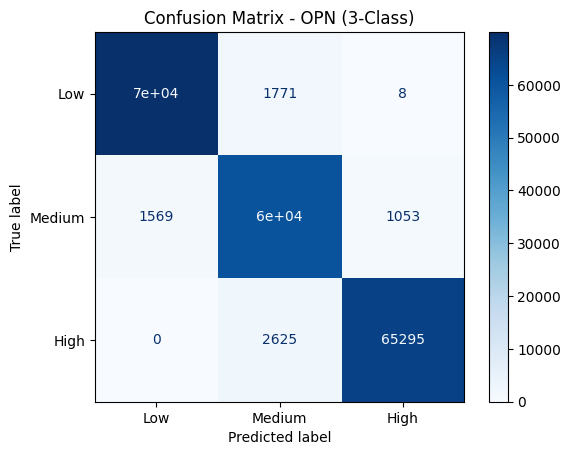

In [73]:
# ================= 3-CLASS CONFUSION MATRICES =================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class_labels = ["Low", "Medium", "High"]

for trait, items in trait_items.items():

    # Recreate same test split (important)
    X = df_ml[items]
    y = df_ml[trait + "_label"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    y_pred = xgb_models[trait].predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=class_labels
    )

    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {trait} (3-Class)")
    plt.show()

In [75]:
QUESTIONNAIRE = {
    "EXT": {
        "EXT1": "I am the life of the party.",
        "EXT2": "I feel comfortable around people.",
        "EXT3": "I start conversations.",
        "EXT4": "I talk to a lot of different people at parties.",
        "EXT5": "I don't mind being the center of attention.",
        "EXT6": "I make friends easily.",
        "EXT7": "I am skilled in handling social situations.",
        "EXT8": "I am outgoing and sociable.",
        "EXT9": "I enjoy social gatherings.",
        "EXT10": "I feel energized when interacting with others."
    },

    "EST": {
        "EST1": "I get stressed out easily.",
        "EST2": "I worry about things.",
        "EST3": "I feel anxious often.",
        "EST4": "I get upset easily.",
        "EST5": "I change my mood a lot.",
        "EST6": "I have frequent mood swings.",
        "EST7": "I get irritated easily.",
        "EST8": "I feel emotionally unstable.",
        "EST9": "I feel nervous in difficult situations.",
        "EST10": "I feel overwhelmed by stress."
    },

    "AGR": {
        "AGR1": "I am interested in people.",
        "AGR2": "I sympathize with others’ feelings.",
        "AGR3": "I have a soft heart.",
        "AGR4": "I take time out for others.",
        "AGR5": "I feel others' emotions.",
        "AGR6": "I make people feel at ease.",
        "AGR7": "I care about others.",
        "AGR8": "I am helpful and unselfish.",
        "AGR9": "I trust others easily.",
        "AGR10": "I am considerate."
    },

    "CSN": {
        "CSN1": "I am always prepared.",
        "CSN2": "I pay attention to details.",
        "CSN3": "I get chores done right away.",
        "CSN4": "I follow a schedule.",
        "CSN5": "I am exacting in my work.",
        "CSN6": "I complete tasks efficiently.",
        "CSN7": "I plan ahead.",
        "CSN8": "I am disciplined.",
        "CSN9": "I meet deadlines.",
        "CSN10": "I am reliable."
    },

    "OPN": {
        "OPN1": "I have a rich vocabulary.",
        "OPN2": "I have a vivid imagination.",
        "OPN3": "I have excellent ideas.",
        "OPN4": "I am quick to understand things.",
        "OPN5": "I enjoy abstract ideas.",
        "OPN6": "I enjoy artistic experiences.",
        "OPN7": "I value creativity.",
        "OPN8": "I like to explore new concepts.",
        "OPN9": "I enjoy philosophical discussions.",
        "OPN10": "I am curious about many things."
    }
}

In [76]:
# ================= USER QUESTIONNAIRE INPUT =================

print("Please answer the following questions using the scale below:")
print("1 = Strongly Disagree")
print("2 = Disagree")
print("3 = Neutral")
print("4 = Agree")
print("5 = Strongly Agree\n")

user_responses = {}

for trait, questions in QUESTIONNAIRE.items():

    print(f"\n--- {trait} Section ---")

    question_number = 1
    total_questions = len(questions)

    for code, question in questions.items():

        while True:
            try:
                value = int(input(
                    f"[{trait} - Q{question_number}/{total_questions}] "
                    f"{question} (1-5): "
                ))

                if 1 <= value <= 5:
                    user_responses[code] = value
                    question_number += 1
                    break
                else:
                    print(" Please enter a number between 1 and 5.")

            except:
                print(" Invalid input. Enter a number between 1 and 5.")

# Convert responses to DataFrame
user_df = pd.DataFrame([user_responses])

print("\nUser responses recorded successfully.")

Please answer the following questions using the scale below:
1 = Strongly Disagree
2 = Disagree
3 = Neutral
4 = Agree
5 = Strongly Agree


--- EXT Section ---
[EXT - Q1/10] I am the life of the party. (1-5): 1
[EXT - Q2/10] I feel comfortable around people. (1-5): 3
[EXT - Q3/10] I start conversations. (1-5): 2
[EXT - Q4/10] I talk to a lot of different people at parties. (1-5): 2
[EXT - Q5/10] I don't mind being the center of attention. (1-5): 4
[EXT - Q6/10] I make friends easily. (1-5): 5
[EXT - Q7/10] I am skilled in handling social situations. (1-5): 3
[EXT - Q8/10] I am outgoing and sociable. (1-5): 4
[EXT - Q9/10] I enjoy social gatherings. (1-5): 3
[EXT - Q10/10] I feel energized when interacting with others. (1-5): 5

--- EST Section ---
[EST - Q1/10] I get stressed out easily. (1-5): 5
[EST - Q2/10] I worry about things. (1-5): 4
[EST - Q3/10] I feel anxious often. (1-5): 5
[EST - Q4/10] I get upset easily. (1-5): 4
[EST - Q5/10] I change my mood a lot. (1-5): 3
[EST - Q6/10]

In [77]:
# ================= USER TRAIT PREDICTION (FINAL CORRECT VERSION) =================

level_map = {0: "Low", 1: "Medium", 2: "High"}

trait_scores = {}

for trait, items in trait_items.items():

    sample_df = user_df[items].copy()

    # Reverse EST before prediction
    if trait == "EST":
        sample_df[items] = 6 - sample_df[items]

    probs = xgb_models[trait].predict_proba(sample_df)[0]
    predicted_class = xgb_models[trait].predict(sample_df)[0]

    trait_scores[trait] = {
        "Level": level_map[predicted_class],
        "Confidence": round(float(max(probs)), 3)
    }

print("\nUser 3-Class Trait Predictions:")
print("-" * 40)

for trait, data in trait_scores.items():
    print(f"{trait}: {data['Level']} (Confidence: {data['Confidence']})")


User 3-Class Trait Predictions:
----------------------------------------
EXT: Medium (Confidence: 0.496)
EST: Low (Confidence: 1.0)
AGR: High (Confidence: 0.996)
CSN: High (Confidence: 0.976)
OPN: Low (Confidence: 0.999)


In [78]:
# ================= FULL ADVANCED POST-ANALYSIS (3-CLASS) =================

import numpy as np

level_weight = {"Low": 1, "Medium": 2, "High": 3}

# Convert to numeric strengths
numeric_scores = {
    trait: level_weight[data["Level"]]
    for trait, data in trait_scores.items()
}

# ---------------- Dominance Ranking ----------------
def dominance_ranking(scores):
    return sorted(scores.items(), key=lambda x: (-x[1], x[0]))

# ---------------- Stability Index (Improved Normalization) ----------------
def stability_index(scores):
    values = np.array(list(scores.values()))
    variance = np.var(values)
    max_variance = 2  # maximum possible variance in 1-3 scale
    stability = (1 - (variance / max_variance)) * np.mean(values)
    return round(float(stability), 3)

# ---------------- Psychological Risk ----------------
def psychological_risk(scores):
    risk_score = 0

    # Low Emotional Stability = major risk
    if scores["EST"] == 1:
        risk_score += 2

    # Low Conscientiousness or Agreeableness = minor risk
    if scores["CSN"] == 1:
        risk_score += 1
    if scores["AGR"] == 1:
        risk_score += 1

    if risk_score >= 3:
        return "High Psychological Risk"
    elif risk_score == 2:
        return "Moderate Psychological Risk"
    else:
        return "Low Psychological Risk"

# ---------------- Confidence Weight ----------------
def confidence_weight(original_scores):
    output = {}
    for trait, data in original_scores.items():
        conf = data["Confidence"]
        if conf >= 0.8:
            output[trait] = "High"
        elif conf >= 0.6:
            output[trait] = "Moderate"
        else:
            output[trait] = "Low"
    return output

# ---------------- Personality Risk Heat Map (Cleaned) ----------------
def personality_risk_heat(scores):
    heat = {}
    for trait, val in scores.items():
        heat[trait] = "High Risk" if val == 1 else "Low Risk"
    return heat

# ---------------- Trait Conflict Detection ----------------
def trait_conflict(scores):
    conflicts = []

    if scores["EXT"] == 3 and scores["EST"] == 1:
        conflicts.append("High Extraversion with Emotional Vulnerability")

    if scores["CSN"] == 3 and scores["OPN"] == 1:
        conflicts.append("Highly Structured but Low Openness Conflict")

    return conflicts if conflicts else ["No major conflicts detected"]

# ---------------- Personalized Recommendation ----------------
def personalized_recommendation(scores):
    top_trait = dominance_ranking(scores)[0][0]

    recommendations = {
        "EXT": "Leadership, public interaction, and networking-intensive roles",
        "EST": "High-pressure decision-making and crisis-resilient environments",
        "AGR": "Collaborative and people-centered work environments",
        "CSN": "Structured, analytical, and goal-driven professional domains",
        "OPN": "Creative, innovative, and research-oriented domains"
    }

    return recommendations[top_trait]

# ---------------- Career Paths (Improved EST Mapping) ----------------
def career_paths(scores):
    dominant = dominance_ranking(scores)[0][0]

    trait_to_career = {
        "EXT": ["Marketing", "Business Development", "Public Relations"],
        "EST": ["Crisis Management", "Defense Services", "Emergency Response"],
        "AGR": ["Human Resources", "Teaching", "Social Work"],
        "CSN": ["Software Engineering", "Finance", "Project Management"],
        "OPN": ["Research", "Design", "Creative Media"]
    }

    return trait_to_career[dominant]

# ================= DISPLAY RESULTS =================

print("\nPOST-ANALYSIS RESULTS")
print("-" * 50)

print("Dominance Ranking:", dominance_ranking(numeric_scores))
print("Stability Index:", stability_index(numeric_scores))
print("Psychological Risk:", psychological_risk(numeric_scores))
print("Confidence Weight:", confidence_weight(trait_scores))
print("Risk Heat Map:", personality_risk_heat(numeric_scores))
print("Trait Conflicts:", trait_conflict(numeric_scores))
print("Recommendation:", personalized_recommendation(numeric_scores))
print("Career Paths:", career_paths(numeric_scores))


POST-ANALYSIS RESULTS
--------------------------------------------------
Dominance Ranking: [('AGR', 3), ('CSN', 3), ('EXT', 2), ('EST', 1), ('OPN', 1)]
Stability Index: 1.2
Psychological Risk: Moderate Psychological Risk
Confidence Weight: {'EXT': 'Low', 'EST': 'High', 'AGR': 'High', 'CSN': 'High', 'OPN': 'High'}
Risk Heat Map: {'EXT': 'Low Risk', 'EST': 'High Risk', 'AGR': 'Low Risk', 'CSN': 'Low Risk', 'OPN': 'High Risk'}
Trait Conflicts: ['Highly Structured but Low Openness Conflict']
Recommendation: Collaborative and people-centered work environments
Career Paths: ['Human Resources', 'Teaching', 'Social Work']


In [79]:
# ================= ADVANCED PROFILE TEXT GENERATION (WEIGHT-AWARE) =================

trait_order = ["EXT", "EST", "AGR", "CSN", "OPN"]

def detailed_trait_description(trait, level, confidence):

    if confidence >= 0.85:
        conf_text = "This classification is strongly supported by model confidence."
    elif confidence >= 0.70:
        conf_text = "This classification shows moderate confidence."
    else:
        conf_text = "This classification should be interpreted cautiously."

    descriptions = {
        "EXT": {
            "High": "The individual demonstrates high sociability, assertiveness, enthusiasm, and comfort in dynamic social environments.",
            "Medium": "The individual shows balanced social engagement, interacting comfortably while also valuing personal reflection.",
            "Low": "The individual prefers low-stimulation environments, deep conversations, and independent activities."
        },
        "EST": {
            "High": "The individual exhibits emotional resilience, psychological stability, and effective stress regulation.",
            "Medium": "The individual maintains moderate emotional balance but may experience situational stress reactivity.",
            "Low": "The individual demonstrates emotional sensitivity, heightened stress perception, and vulnerability to anxiety."
        },
        "AGR": {
            "High": "The individual is cooperative, empathetic, trusting, and values harmonious interpersonal relationships.",
            "Medium": "The individual balances empathy with assertiveness depending on contextual demands.",
            "Low": "The individual may adopt a competitive, analytical, or skeptical interpersonal style."
        },
        "CSN": {
            "High": "The individual is disciplined, organized, goal-oriented, and reliable in structured tasks.",
            "Medium": "The individual demonstrates moderate planning ability and adapts structure when necessary.",
            "Low": "The individual may prefer flexibility over rigid structure and may struggle with sustained organization."
        },
        "OPN": {
            "High": "The individual shows intellectual curiosity, creativity, imagination, and openness to abstract ideas.",
            "Medium": "The individual selectively explores new experiences while maintaining practical grounding.",
            "Low": "The individual prefers familiarity, tradition, and routine over novelty."
        }
    }

    return descriptions[trait][level] + " " + conf_text


def generate_rich_profile(scores):

    profile = "Comprehensive Personality Assessment Report: "

    for trait in trait_order:
        data = scores[trait]
        profile += detailed_trait_description(
            trait,
            data["Level"],
            data["Confidence"]
        ) + " "

    # Interaction logic
    if scores["EST"]["Level"] == "Low":
        profile += "Emotional sensitivity may influence decision-making under pressure. "

    profile += "Overall behavioral architecture reflects multidimensional trait integration shaped by cognitive, emotional, and interpersonal factors."

    return profile


profile_text = generate_rich_profile(trait_scores)

print("\nGenerated Advanced Personality Profile:\n")
print(profile_text)


Generated Advanced Personality Profile:

Comprehensive Personality Assessment Report: The individual shows balanced social engagement, interacting comfortably while also valuing personal reflection. This classification should be interpreted cautiously. The individual demonstrates emotional sensitivity, heightened stress perception, and vulnerability to anxiety. This classification is strongly supported by model confidence. The individual is cooperative, empathetic, trusting, and values harmonious interpersonal relationships. This classification is strongly supported by model confidence. The individual is disciplined, organized, goal-oriented, and reliable in structured tasks. This classification is strongly supported by model confidence. The individual prefers familiarity, tradition, and routine over novelty. This classification is strongly supported by model confidence. Emotional sensitivity may influence decision-making under pressure. Overall behavioral architecture reflects multid

In [80]:
# ================= TRAIT-WEIGHTED ADVANCED SEMANTIC INTELLIGENCE =================

from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

sbert = SentenceTransformer("all-MiniLM-L6-v2")

profile_embedding = sbert.encode([profile_text])
profile_embedding = normalize(profile_embedding)

semantic_profiles = {
    "High Emotional Vulnerability":
        "Personality characterized by emotional instability, stress sensitivity, anxiety vulnerability and low coping resilience.",

    "Emotionally Resilient Individual":
        "Personality characterized by calmness under stress, emotional stability, strong coping mechanisms and psychological balance.",

    "Creative Intellectual Explorer":
        "Highly imaginative, innovative, intellectually curious individual who thrives in research and creative domains.",

    "Structured Strategic Professional":
        "Disciplined, organized, analytical and goal-oriented individual suited for structured professional environments.",

    "Social Leadership Personality":
        "Highly outgoing, dominant, socially confident individual suited for leadership and management roles."
}

prototype_texts = list(semantic_profiles.values())
prototype_labels = list(semantic_profiles.keys())

prototype_embeddings = sbert.encode(prototype_texts)
prototype_embeddings = normalize(prototype_embeddings)

similarities = cosine_similarity(profile_embedding, prototype_embeddings)[0]

# ---------------- TRAIT WEIGHT ADJUSTMENT ----------------

level_weight = {"Low": 1, "Medium": 2, "High": 3}

numeric_traits = {
    trait: level_weight[data["Level"]]
    for trait, data in trait_scores.items()
}

adjusted_scores = []

for i, label in enumerate(prototype_labels):

    score = similarities[i]

    # Alignment adjustments
    if label == "High Emotional Vulnerability":
        score *= (4 - numeric_traits["EST"]) / 3   # Boost if EST low

    elif label == "Emotionally Resilient Individual":
        score *= (numeric_traits["EST"] / 3)       # Boost if EST high

    elif label == "Creative Intellectual Explorer":
        score *= (numeric_traits["OPN"] / 3)

    elif label == "Structured Strategic Professional":
        score *= (numeric_traits["CSN"] / 3)

    elif label == "Social Leadership Personality":
        score *= (numeric_traits["EXT"] / 3)

    adjusted_scores.append(score)

adjusted_scores = np.array(adjusted_scores)

sorted_indices = np.argsort(adjusted_scores)[::-1]

print("\n🔎 Advanced Semantic Interpretation (Trait-Aligned):")
for idx in sorted_indices:
    print(f"{prototype_labels[idx]} → {adjusted_scores[idx]:.4f}")

best_match = prototype_labels[sorted_indices[0]]

print("\n🎯 Dominant Semantic Personality Type:", best_match)

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.



🔎 Advanced Semantic Interpretation (Trait-Aligned):
High Emotional Vulnerability → 0.6634
Structured Strategic Professional → 0.4471
Social Leadership Personality → 0.3348
Emotionally Resilient Individual → 0.2346
Creative Intellectual Explorer → 0.1091

🎯 Dominant Semantic Personality Type: High Emotional Vulnerability


In [81]:
!pip install -q scikit-learn

In [84]:
# ================= RANDOM FOREST 3-CLASS TRAINING =================

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf_models = {}
rf_results = {}

for trait, items in trait_items.items():

    print(f"Training Random Forest for {trait}...")

    # Use ORIGINAL data
    X = df_clean[items].copy()

    # Reverse EST (same logic as XGBoost)
    if trait == "EST":
        X[items] = 6 - X[items]

    y = df_ml[trait + "_label"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    model = RandomForestClassifier(
    n_estimators=150,        # reduced from 300
    max_depth=15,           # limit tree depth
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rf_results[trait] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }

    rf_models[trait] = model

print("Random Forest training completed.")

Training Random Forest for EXT...
Training Random Forest for EST...
Training Random Forest for AGR...
Training Random Forest for CSN...
Training Random Forest for OPN...
Random Forest training completed.


In [85]:
print("\nRandom Forest 3-Class Evaluation Metrics:\n")

for trait, metrics in rf_results.items():
    print(trait + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 40)


Random Forest 3-Class Evaluation Metrics:

EXT:
  Accuracy: 0.9114
  Precision: 0.9149
  Recall: 0.9114
  F1-Score: 0.9120
----------------------------------------
EST:
  Accuracy: 0.9414
  Precision: 0.9426
  Recall: 0.9414
  F1-Score: 0.9418
----------------------------------------
AGR:
  Accuracy: 0.9164
  Precision: 0.9190
  Recall: 0.9164
  F1-Score: 0.9170
----------------------------------------
CSN:
  Accuracy: 0.9132
  Precision: 0.9151
  Recall: 0.9132
  F1-Score: 0.9137
----------------------------------------
OPN:
  Accuracy: 0.9289
  Precision: 0.9308
  Recall: 0.9289
  F1-Score: 0.9294
----------------------------------------


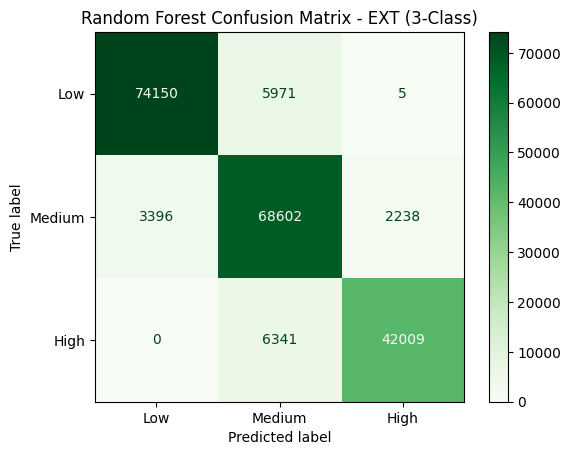

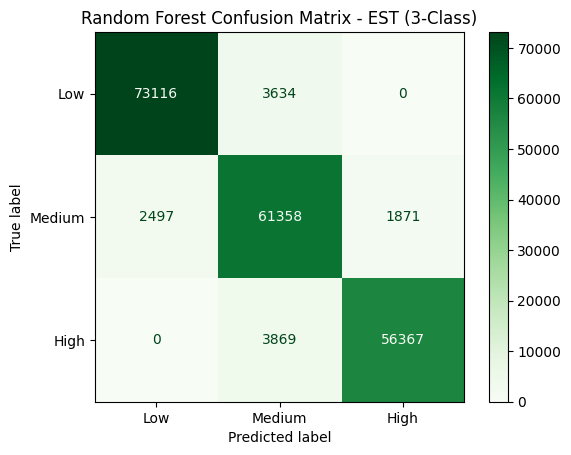

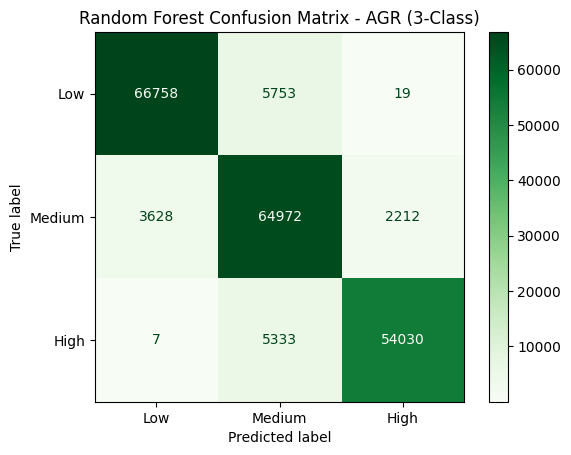

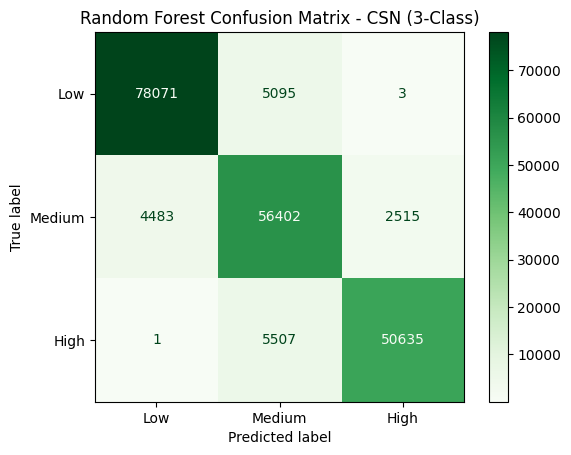

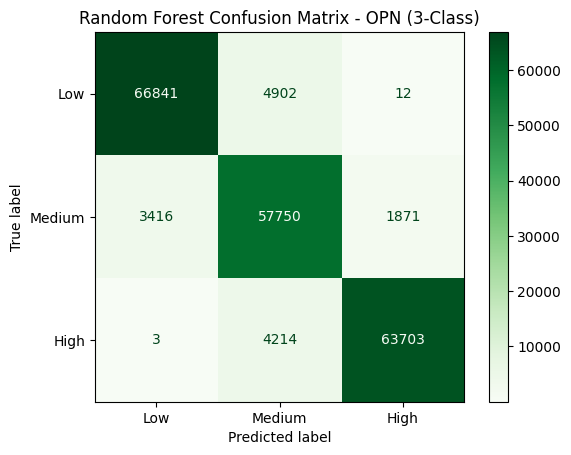

In [86]:
# ================= RANDOM FOREST CONFUSION MATRICES =================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class_labels = ["Low", "Medium", "High"]

for trait, items in trait_items.items():

    X = df_clean[items].copy()

    if trait == "EST":
        X[items] = 6 - X[items]

    y = df_ml[trait + "_label"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    y_pred = rf_models[trait].predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=class_labels
    )

    disp.plot(cmap="Greens")
    plt.title(f"Random Forest Confusion Matrix - {trait} (3-Class)")
    plt.show()

In [87]:
# ================= USER TRAIT PREDICTION (RANDOM FOREST) =================

level_map = {0: "Low", 1: "Medium", 2: "High"}

rf_trait_scores = {}

for trait, items in trait_items.items():

    sample_df = user_df[items].copy()

    # Reverse EST before prediction
    if trait == "EST":
        sample_df[items] = 6 - sample_df[items]

    probs = rf_models[trait].predict_proba(sample_df)[0]
    predicted_class = rf_models[trait].predict(sample_df)[0]

    rf_trait_scores[trait] = {
        "Level": level_map[predicted_class],
        "Confidence": round(float(max(probs)), 3)
    }

print("\nRandom Forest User 3-Class Trait Predictions:")
print("-" * 40)

for trait, data in rf_trait_scores.items():
    print(f"{trait}: {data['Level']} (Confidence: {data['Confidence']})")


Random Forest User 3-Class Trait Predictions:
----------------------------------------
EXT: Medium (Confidence: 0.458)
EST: Low (Confidence: 1.0)
AGR: High (Confidence: 0.987)
CSN: High (Confidence: 0.952)
OPN: Low (Confidence: 0.999)


In [88]:
# ================= DECISION TREE 3-CLASS TRAINING =================

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dt_models = {}
dt_results = {}

for trait, items in trait_items.items():

    print(f"Training Decision Tree for {trait}...")

    # Original data
    X = df_clean[items].copy()

    # Reverse EST
    if trait == "EST":
        X[items] = 6 - X[items]

    y = df_ml[trait + "_label"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    model = DecisionTreeClassifier(
        max_depth=12,              # controls overfitting
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    dt_results[trait] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }

    dt_models[trait] = model

print("Decision Tree training completed.")

Training Decision Tree for EXT...
Training Decision Tree for EST...
Training Decision Tree for AGR...
Training Decision Tree for CSN...
Training Decision Tree for OPN...
Decision Tree training completed.


In [89]:
print("\nDecision Tree 3-Class Evaluation Metrics:\n")

for trait, metrics in dt_results.items():
    print(trait + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 40)


Decision Tree 3-Class Evaluation Metrics:

EXT:
  Accuracy: 0.7784
  Precision: 0.7856
  Recall: 0.7784
  F1-Score: 0.7804
----------------------------------------
EST:
  Accuracy: 0.8823
  Precision: 0.8838
  Recall: 0.8823
  F1-Score: 0.8829
----------------------------------------
AGR:
  Accuracy: 0.7993
  Precision: 0.8037
  Recall: 0.7993
  F1-Score: 0.8008
----------------------------------------
CSN:
  Accuracy: 0.7821
  Precision: 0.7884
  Recall: 0.7821
  F1-Score: 0.7844
----------------------------------------
OPN:
  Accuracy: 0.8383
  Precision: 0.8434
  Recall: 0.8383
  F1-Score: 0.8401
----------------------------------------


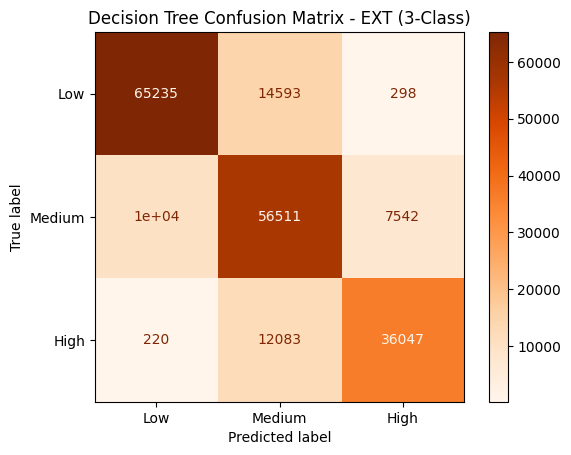

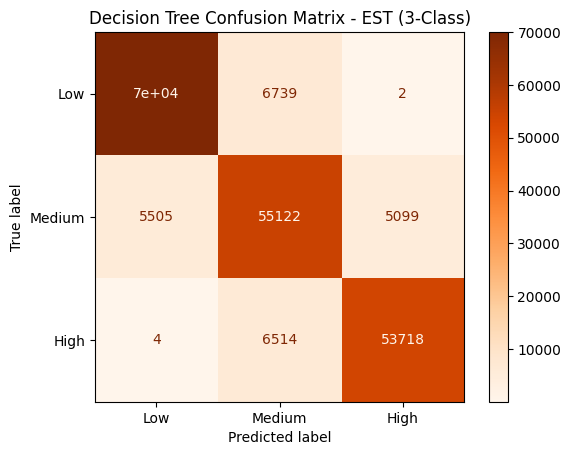

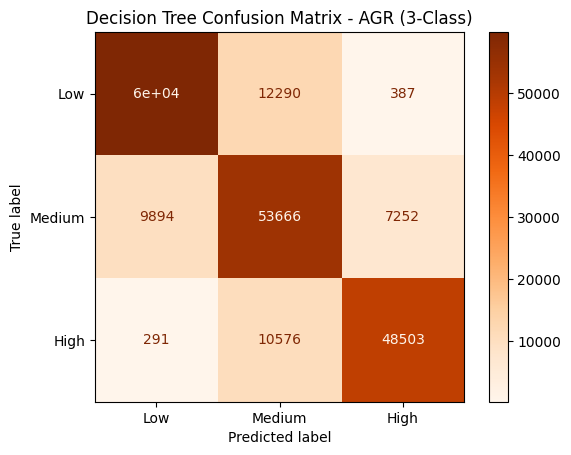

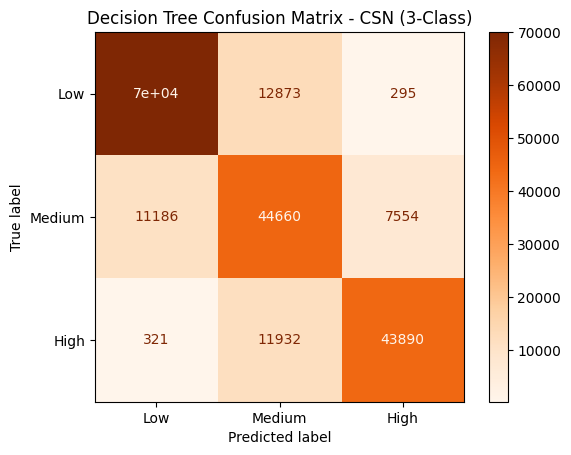

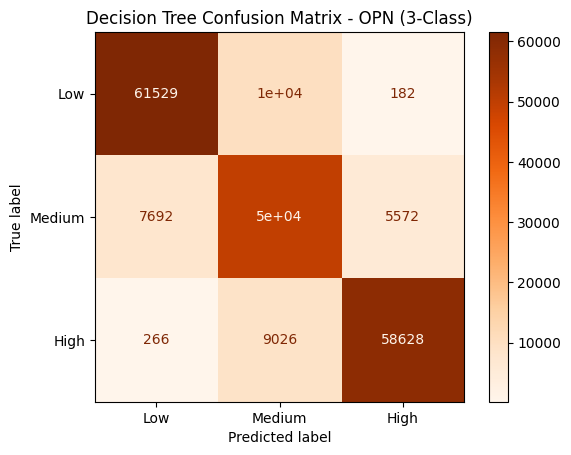

In [90]:
# ================= DECISION TREE CONFUSION MATRICES =================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class_labels = ["Low", "Medium", "High"]

for trait, items in trait_items.items():

    X = df_clean[items].copy()

    if trait == "EST":
        X[items] = 6 - X[items]

    y = df_ml[trait + "_label"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    y_pred = dt_models[trait].predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=class_labels
    )

    disp.plot(cmap="Oranges")
    plt.title(f"Decision Tree Confusion Matrix - {trait} (3-Class)")
    plt.show()

In [91]:
# ================= USER TRAIT PREDICTION (DECISION TREE) =================

level_map = {0: "Low", 1: "Medium", 2: "High"}

dt_trait_scores = {}

for trait, items in trait_items.items():

    sample_df = user_df[items].copy()

    if trait == "EST":
        sample_df[items] = 6 - sample_df[items]

    probs = dt_models[trait].predict_proba(sample_df)[0]
    predicted_class = dt_models[trait].predict(sample_df)[0]

    dt_trait_scores[trait] = {
        "Level": level_map[predicted_class],
        "Confidence": round(float(max(probs)), 3)
    }

print("\nDecision Tree User 3-Class Trait Predictions:")
print("-" * 40)

for trait, data in dt_trait_scores.items():
    print(f"{trait}: {data['Level']} (Confidence: {data['Confidence']})")


Decision Tree User 3-Class Trait Predictions:
----------------------------------------
EXT: High (Confidence: 0.933)
EST: Low (Confidence: 1.0)
AGR: High (Confidence: 0.961)
CSN: High (Confidence: 0.985)
OPN: Low (Confidence: 0.995)


In [97]:
# ================= IMPORTS =================

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

In [98]:
# ================= MULTINOMIAL NB TRAINING =================

mnb_models = {}
mnb_results = {}

for trait, items in trait_items.items():

    print(f"\nTraining Multinomial NB for {trait}...")

    # Use original data
    X = df_clean[items].copy()

    # Reverse EST
    if trait == "EST":
        X[items] = 6 - X[items]

    y = df_ml[trait + "_label"]

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # ================= BALANCING =================
    ros = RandomOverSampler(random_state=42)
    X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

    # ================= MODEL =================
    model = MultinomialNB(alpha=0.5)

    model.fit(X_train_res, y_train_res)

    y_pred = model.predict(X_test)

    # ================= METRICS =================
    mnb_results[trait] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }

    mnb_models[trait] = model

print("\nMultinomial Naive Bayes training completed.")


Training Multinomial NB for EXT...

Training Multinomial NB for EST...

Training Multinomial NB for AGR...

Training Multinomial NB for CSN...

Training Multinomial NB for OPN...

Multinomial Naive Bayes training completed.


In [99]:
print("\nMultinomial NB 3-Class Evaluation Metrics:\n")

for trait, metrics in mnb_results.items():
    print(trait + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 40)


Multinomial NB 3-Class Evaluation Metrics:

EXT:
  Accuracy: 0.4039
  Precision: 0.3992
  Recall: 0.4039
  F1-Score: 0.3868
----------------------------------------
EST:
  Accuracy: 0.6377
  Precision: 0.6413
  Recall: 0.6377
  F1-Score: 0.6385
----------------------------------------
AGR:
  Accuracy: 0.4601
  Precision: 0.4668
  Recall: 0.4601
  F1-Score: 0.4514
----------------------------------------
CSN:
  Accuracy: 0.4133
  Precision: 0.4191
  Recall: 0.4133
  F1-Score: 0.4127
----------------------------------------
OPN:
  Accuracy: 0.4892
  Precision: 0.4681
  Recall: 0.4892
  F1-Score: 0.4691
----------------------------------------


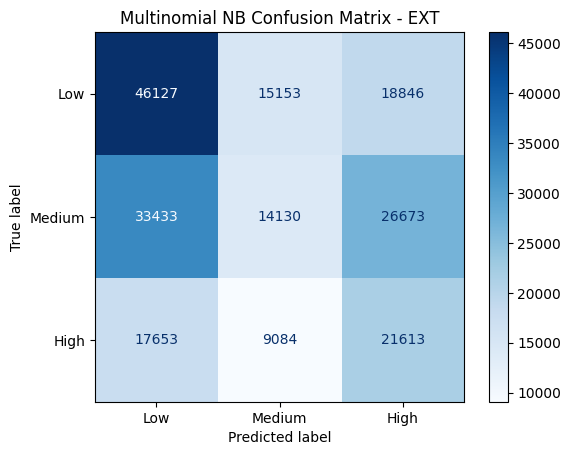

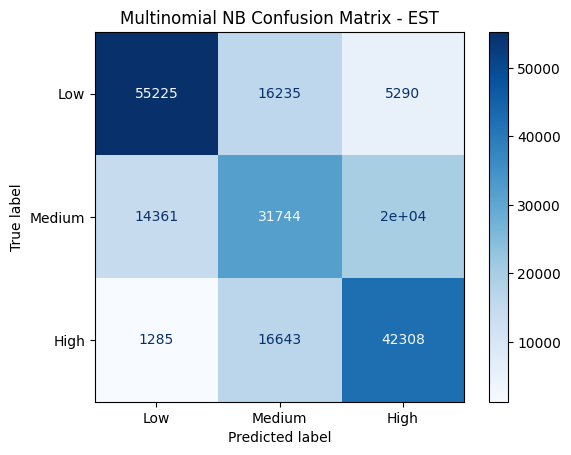

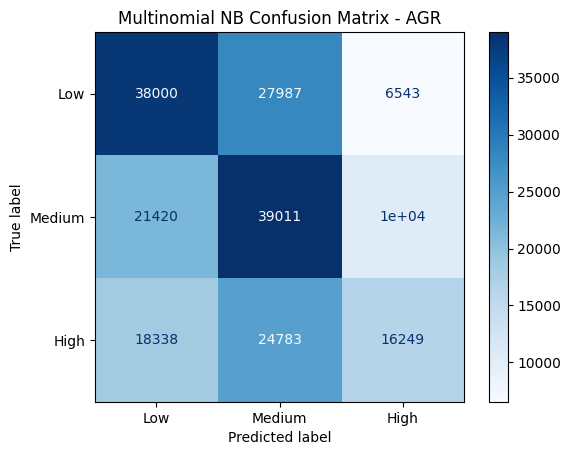

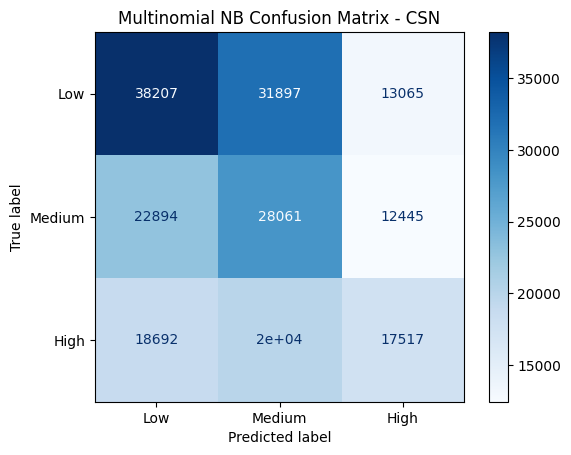

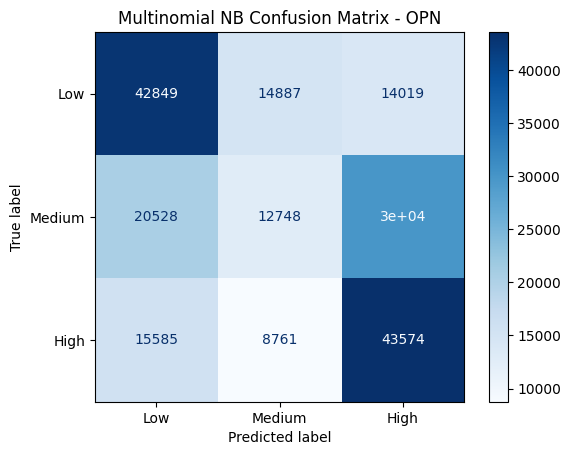

In [100]:
# ================= CONFUSION MATRICES =================

class_labels = ["Low", "Medium", "High"]

for trait, items in trait_items.items():

    X = df_clean[items].copy()

    if trait == "EST":
        X[items] = 6 - X[items]

    y = df_ml[trait + "_label"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    y_pred = mnb_models[trait].predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=class_labels
    )

    disp.plot(cmap="Blues")
    plt.title(f"Multinomial NB Confusion Matrix - {trait}")
    plt.show()

In [101]:
# ================= USER TRAIT PREDICTION =================

level_map = {0: "Low", 1: "Medium", 2: "High"}

mnb_trait_scores = {}

for trait, items in trait_items.items():

    sample_df = user_df[items].copy()

    # Reverse EST
    if trait == "EST":
        sample_df[items] = 6 - sample_df[items]

    probs = mnb_models[trait].predict_proba(sample_df)[0]
    predicted_class = mnb_models[trait].predict(sample_df)[0]

    mnb_trait_scores[trait] = {
        "Level": level_map[predicted_class],
        "Confidence": round(float(max(probs)), 3)
    }

print("\nMultinomial NB User 3-Class Trait Predictions:")
print("-" * 40)

for trait, data in mnb_trait_scores.items():
    print(f"{trait}: {data['Level']} (Confidence: {data['Confidence']})")


Multinomial NB User 3-Class Trait Predictions:
----------------------------------------
EXT: Low (Confidence: 0.345)
EST: Low (Confidence: 0.425)
AGR: Low (Confidence: 0.575)
CSN: Low (Confidence: 0.355)
OPN: Low (Confidence: 0.369)


In [102]:
# ================= IMPORTS =================

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [103]:
# ================= KNN TRAINING =================

knn_models = {}
knn_results = {}

for trait, items in trait_items.items():

    print(f"\nTraining KNN for {trait}...")

    X = df_clean[items].copy()

    # Reverse EST
    if trait == "EST":
        X[items] = 6 - X[items]

    y = df_ml[trait + "_label"]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # ================= SPEED OPTIMIZATION =================
    # Use subset of training data (important for large dataset)
    subset_size = 150000  # you can change to 100000 if still slow

    if len(X_train) > subset_size:
        idx = np.random.choice(len(X_train), subset_size, replace=False)
        X_train = X_train.iloc[idx]
        y_train = y_train.iloc[idx]

    # ================= MODEL =================
    model = KNeighborsClassifier(
        n_neighbors=7,
        weights='distance',
        algorithm='auto',
        n_jobs=-1
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # ================= METRICS =================
    knn_results[trait] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }

    knn_models[trait] = model

print("\nKNN training completed.")


Training KNN for EXT...

Training KNN for EST...

Training KNN for AGR...

Training KNN for CSN...

Training KNN for OPN...

KNN training completed.


In [104]:
print("\nKNN 3-Class Evaluation Metrics:\n")

for trait, metrics in knn_results.items():
    print(trait + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 40)


KNN 3-Class Evaluation Metrics:

EXT:
  Accuracy: 0.9164
  Precision: 0.9178
  Recall: 0.9164
  F1-Score: 0.9166
----------------------------------------
EST:
  Accuracy: 0.9486
  Precision: 0.9489
  Recall: 0.9486
  F1-Score: 0.9487
----------------------------------------
AGR:
  Accuracy: 0.9305
  Precision: 0.9312
  Recall: 0.9305
  F1-Score: 0.9307
----------------------------------------
CSN:
  Accuracy: 0.9168
  Precision: 0.9178
  Recall: 0.9168
  F1-Score: 0.9171
----------------------------------------
OPN:
  Accuracy: 0.9456
  Precision: 0.9459
  Recall: 0.9456
  F1-Score: 0.9457
----------------------------------------


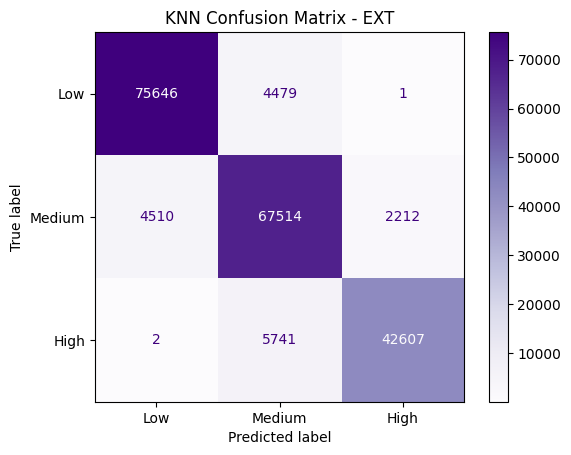

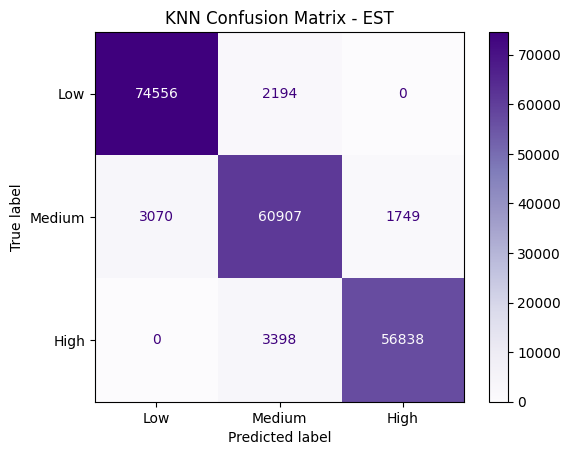

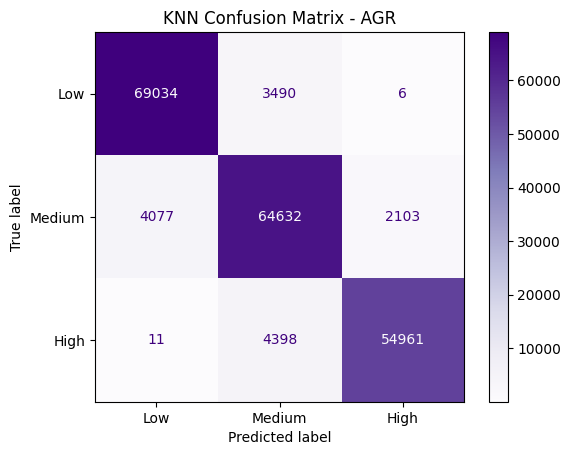

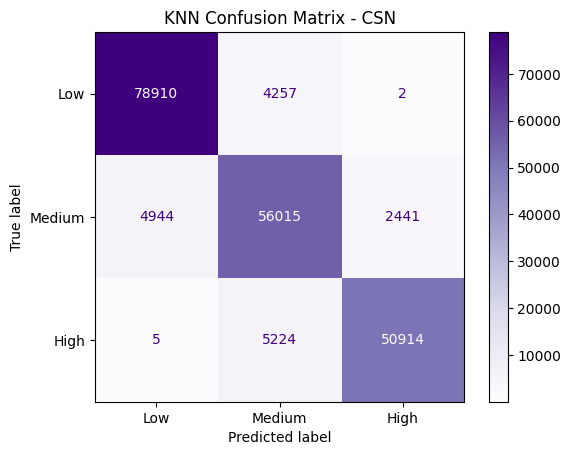

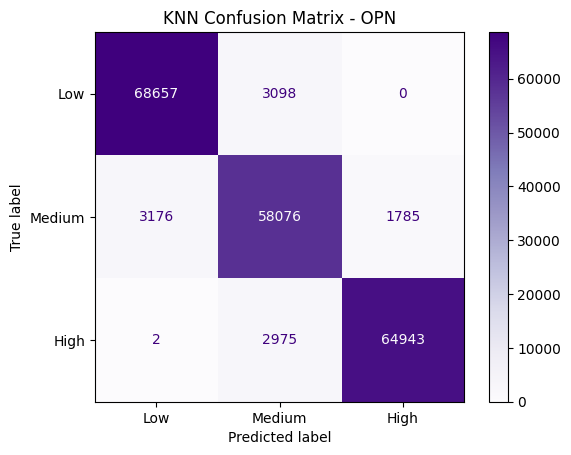

In [105]:
# ================= CONFUSION MATRICES =================

class_labels = ["Low", "Medium", "High"]

for trait, items in trait_items.items():

    X = df_clean[items].copy()

    if trait == "EST":
        X[items] = 6 - X[items]

    y = df_ml[trait + "_label"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    y_pred = knn_models[trait].predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=class_labels
    )

    disp.plot(cmap="Purples")
    plt.title(f"KNN Confusion Matrix - {trait}")
    plt.show()

In [106]:
# ================= USER TRAIT PREDICTION =================

level_map = {0: "Low", 1: "Medium", 2: "High"}

knn_trait_scores = {}

for trait, items in trait_items.items():

    sample_df = user_df[items].copy()

    if trait == "EST":
        sample_df[items] = 6 - sample_df[items]

    probs = knn_models[trait].predict_proba(sample_df)[0]
    predicted_class = knn_models[trait].predict(sample_df)[0]

    knn_trait_scores[trait] = {
        "Level": level_map[predicted_class],
        "Confidence": round(float(max(probs)), 3)
    }

print("\nKNN User 3-Class Trait Predictions:")
print("-" * 40)

for trait, data in knn_trait_scores.items():
    print(f"{trait}: {data['Level']} (Confidence: {data['Confidence']})")


KNN User 3-Class Trait Predictions:
----------------------------------------
EXT: High (Confidence: 0.728)
EST: Low (Confidence: 1.0)
AGR: High (Confidence: 1.0)
CSN: High (Confidence: 1.0)
OPN: Low (Confidence: 1.0)


In [107]:
# ================= IMPORTS =================

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [110]:
# ================= SVM TRAINING (PARTIAL ITEMS) =================

svm_models = {}
svm_results = {}
svm_selected_items = {}

for trait, items in trait_items.items():

    print(f"\nTraining Linear SVM (Partial Items) for {trait}...")

    # ===== Select 70% of items =====
    np.random.seed(42)
    selected_items = np.random.choice(
        items,
        size=int(len(items) * 0.7),
        replace=False
    )

    svm_selected_items[trait] = list(selected_items)

    X = df_clean[list(selected_items)].copy()

    # Reverse EST
    if trait == "EST":
        X[selected_items] = 6 - X[selected_items]

    y = df_ml[trait + "_label"]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # Pipeline (prevents scaling leakage)
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', LinearSVC(
            C=1.0,
            max_iter=5000,
            dual=False,
            random_state=42
        ))
    ])

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Metrics
    svm_results[trait] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }

    svm_models[trait] = model

print("\nSVM (Partial Items) training completed.")


Training Linear SVM (Partial Items) for EXT...

Training Linear SVM (Partial Items) for EST...

Training Linear SVM (Partial Items) for AGR...

Training Linear SVM (Partial Items) for CSN...

Training Linear SVM (Partial Items) for OPN...

SVM (Partial Items) training completed.


In [111]:
print("\nLinear SVM (Partial Items) 3-Class Evaluation Metrics:\n")

for trait, metrics in svm_results.items():
    print(trait + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 40)


Linear SVM (Partial Items) 3-Class Evaluation Metrics:

EXT:
  Accuracy: 0.7219
  Precision: 0.7169
  Recall: 0.7219
  F1-Score: 0.7118
----------------------------------------
EST:
  Accuracy: 0.8311
  Precision: 0.8329
  Recall: 0.8311
  F1-Score: 0.8217
----------------------------------------
AGR:
  Accuracy: 0.7444
  Precision: 0.7423
  Recall: 0.7444
  F1-Score: 0.7304
----------------------------------------
CSN:
  Accuracy: 0.7122
  Precision: 0.7034
  Recall: 0.7122
  F1-Score: 0.6751
----------------------------------------
OPN:
  Accuracy: 0.7265
  Precision: 0.7255
  Recall: 0.7265
  F1-Score: 0.6874
----------------------------------------


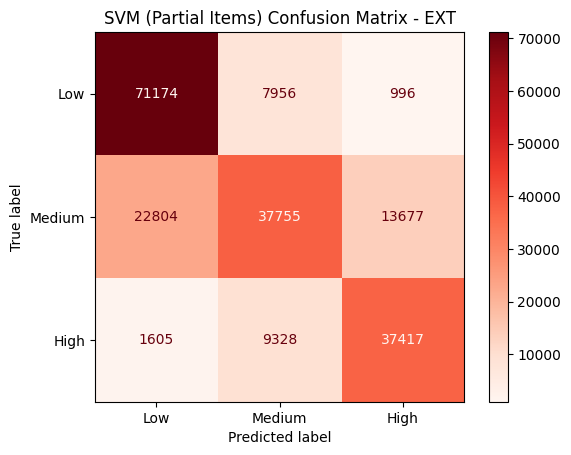

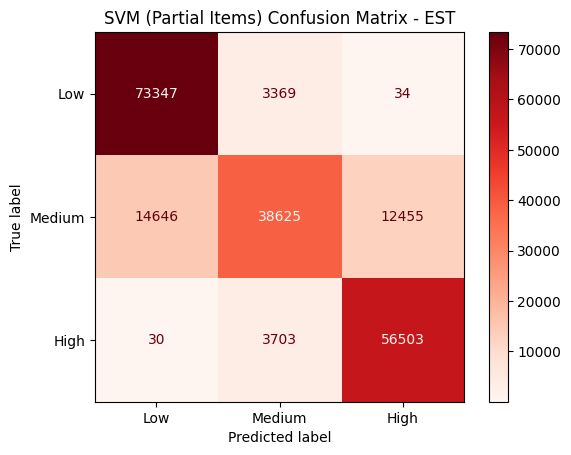

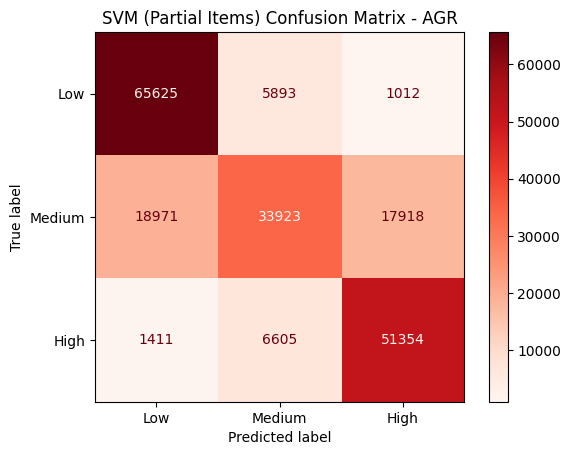

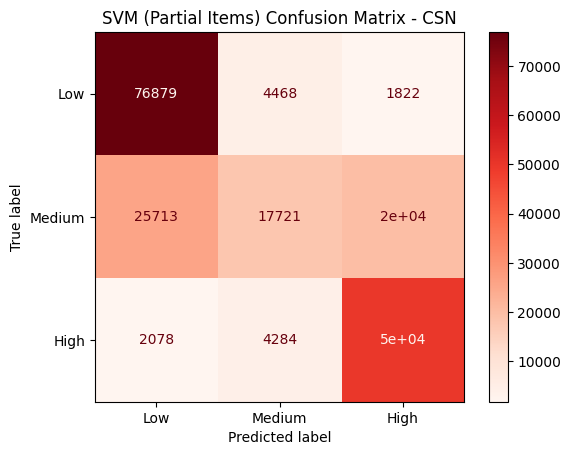

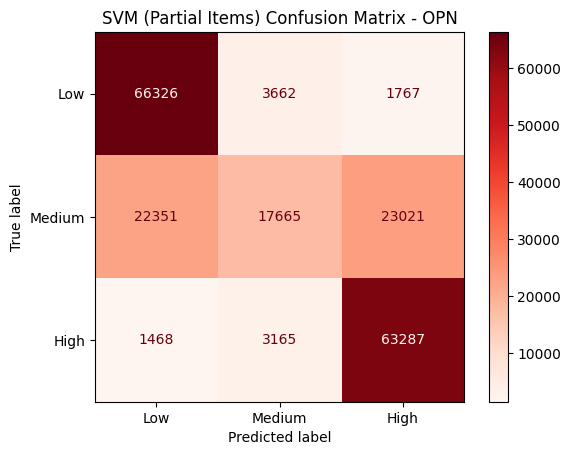

In [112]:
# ================= CONFUSION MATRICES =================

class_labels = ["Low", "Medium", "High"]

for trait in trait_items.keys():

    selected_items = svm_selected_items[trait]

    X = df_clean[selected_items].copy()

    if trait == "EST":
        X[selected_items] = 6 - X[selected_items]

    y = df_ml[trait + "_label"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    y_pred = svm_models[trait].predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=class_labels
    )

    disp.plot(cmap="Reds")
    plt.title(f"SVM (Partial Items) Confusion Matrix - {trait}")
    plt.show()

In [113]:
# ================= USER TRAIT PREDICTION =================

level_map = {0: "Low", 1: "Medium", 2: "High"}

svm_trait_scores = {}

for trait in trait_items.keys():

    selected_items = svm_selected_items[trait]

    sample_df = user_df[selected_items].copy()

    if trait == "EST":
        sample_df[selected_items] = 6 - sample_df[selected_items]

    predicted_class = svm_models[trait].predict(sample_df)[0]

    svm_trait_scores[trait] = {
        "Level": level_map[predicted_class]
    }

print("\nLinear SVM (Partial Items) User Predictions:")
print("-" * 40)

for trait, data in svm_trait_scores.items():
    print(f"{trait}: {data['Level']}")


Linear SVM (Partial Items) User Predictions:
----------------------------------------
EXT: Medium
EST: Low
AGR: High
CSN: High
OPN: Low


In [114]:
# ================= IMPORTS =================

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [115]:
# ================= LOGISTIC REGRESSION TRAINING =================

lr_models = {}
lr_results = {}
lr_selected_items = {}

for trait, items in trait_items.items():

    print(f"\nTraining Logistic Regression (Partial Items) for {trait}...")

    # ===== Select 70% of items =====
    np.random.seed(42)
    selected_items = np.random.choice(
        items,
        size=int(len(items) * 0.7),
        replace=False
    )

    lr_selected_items[trait] = list(selected_items)

    X = df_clean[list(selected_items)].copy()

    # Reverse EST
    if trait == "EST":
        X[selected_items] = 6 - X[selected_items]

    y = df_ml[trait + "_label"]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # Pipeline (Scaling inside pipeline prevents leakage)
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(
            multi_class='multinomial',
            solver='lbfgs',
            max_iter=2000,
            C=1.0,
            random_state=42
        ))
    ])

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Metrics
    lr_results[trait] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }

    lr_models[trait] = model

print("\nLogistic Regression (Partial Items) training completed.")


Training Logistic Regression (Partial Items) for EXT...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Training Logistic Regression (Partial Items) for EST...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Training Logistic Regression (Partial Items) for AGR...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Training Logistic Regression (Partial Items) for CSN...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Training Logistic Regression (Partial Items) for OPN...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression (Partial Items) training completed.


In [116]:
print("\nLogistic Regression (Partial Items) 3-Class Evaluation Metrics:\n")

for trait, metrics in lr_results.items():
    print(trait + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 40)


Logistic Regression (Partial Items) 3-Class Evaluation Metrics:

EXT:
  Accuracy: 0.7400
  Precision: 0.7449
  Recall: 0.7400
  F1-Score: 0.7414
----------------------------------------
EST:
  Accuracy: 0.8610
  Precision: 0.8617
  Recall: 0.8610
  F1-Score: 0.8613
----------------------------------------
AGR:
  Accuracy: 0.7752
  Precision: 0.7795
  Recall: 0.7752
  F1-Score: 0.7768
----------------------------------------
CSN:
  Accuracy: 0.7448
  Precision: 0.7472
  Recall: 0.7448
  F1-Score: 0.7457
----------------------------------------
OPN:
  Accuracy: 0.7744
  Precision: 0.7756
  Recall: 0.7744
  F1-Score: 0.7750
----------------------------------------


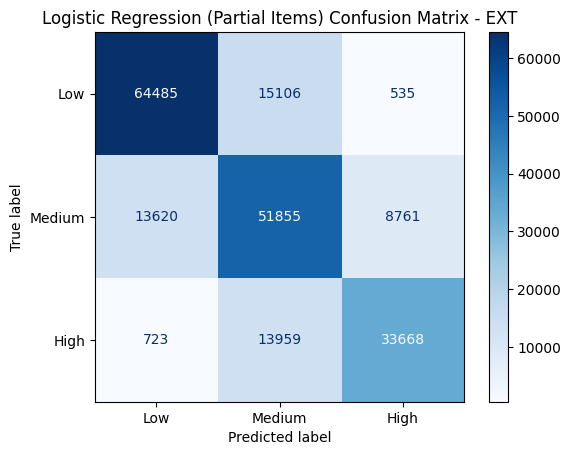

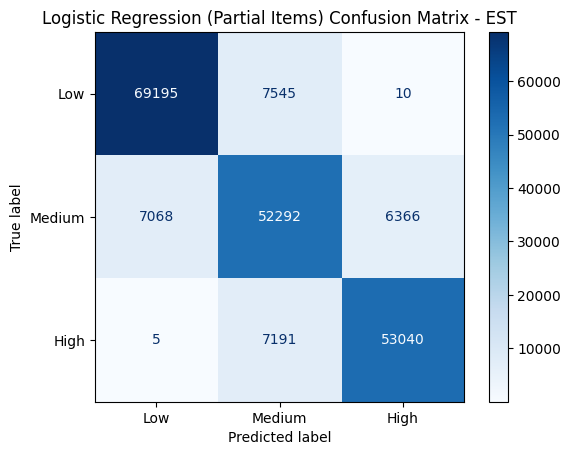

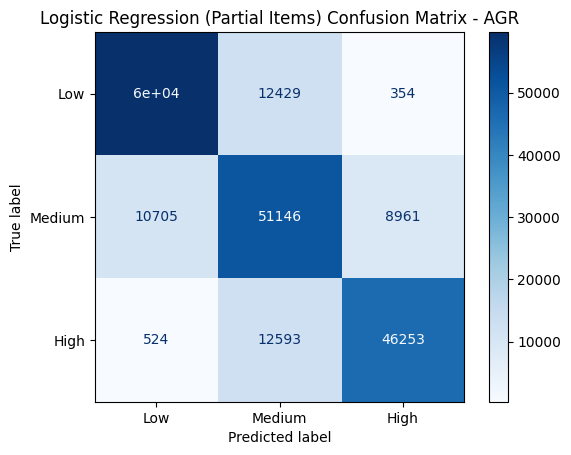

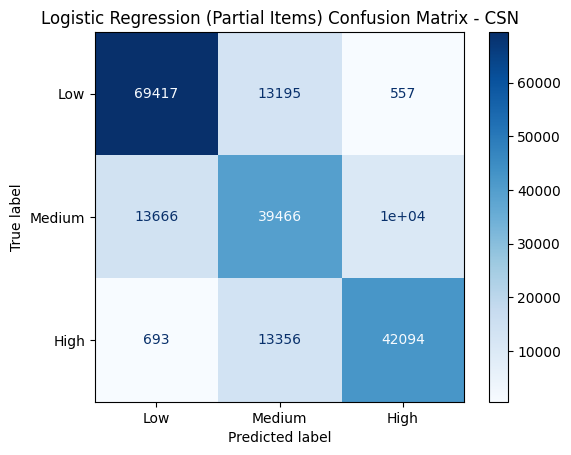

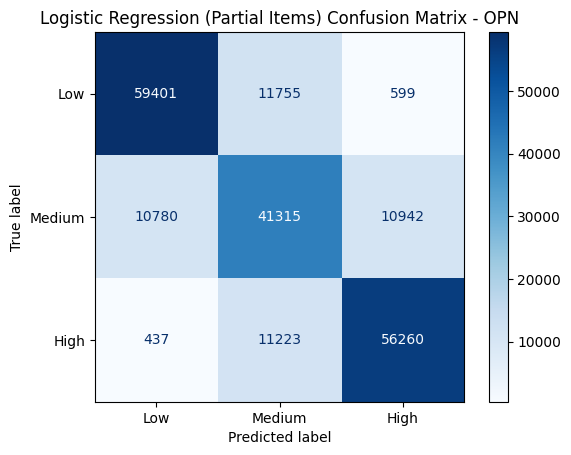

In [117]:
# ================= CONFUSION MATRICES =================

class_labels = ["Low", "Medium", "High"]

for trait in trait_items.keys():

    selected_items = lr_selected_items[trait]

    X = df_clean[selected_items].copy()

    if trait == "EST":
        X[selected_items] = 6 - X[selected_items]

    y = df_ml[trait + "_label"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    y_pred = lr_models[trait].predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=class_labels
    )

    disp.plot(cmap="Blues")
    plt.title(f"Logistic Regression (Partial Items) Confusion Matrix - {trait}")
    plt.show()

In [118]:
# ================= USER TRAIT PREDICTION =================

level_map = {0: "Low", 1: "Medium", 2: "High"}

lr_trait_scores = {}

for trait in trait_items.keys():

    selected_items = lr_selected_items[trait]

    sample_df = user_df[selected_items].copy()

    if trait == "EST":
        sample_df[selected_items] = 6 - sample_df[selected_items]

    predicted_class = lr_models[trait].predict(sample_df)[0]

    lr_trait_scores[trait] = {
        "Level": level_map[predicted_class]
    }

print("\nLogistic Regression (Partial Items) User Predictions:")
print("-" * 40)

for trait, data in lr_trait_scores.items():
    print(f"{trait}: {data['Level']}")


Logistic Regression (Partial Items) User Predictions:
----------------------------------------
EXT: Medium
EST: Low
AGR: High
CSN: High
OPN: Low


In [120]:
# ================= FINAL MODEL COMPARISON =================

import pandas as pd

all_results = {
    "XGBoost": xgb_results,
    "Random Forest": rf_results,
    "Logistic Regression": lr_results,
    "Naive Bayes": mnb_results,
    "SVM": svm_results,
    "Decision Tree": dt_results,
    "KNN": knn_results
}

comparison_rows = []

for model_name, trait_dict in all_results.items():
    for trait, metrics in trait_dict.items():
        row = {
            "Model": model_name,
            "Trait": trait,
            "Accuracy": metrics["Accuracy"],
            "Precision": metrics["Precision"],
            "Recall": metrics["Recall"],
            "F1-Score": metrics["F1-Score"]
        }
        comparison_rows.append(row)

comparison_df = pd.DataFrame(comparison_rows)

print("\n=== Detailed Model Comparison ===")
display(comparison_df)


=== Detailed Model Comparison ===


,Model,Trait,Accuracy,Precision,Recall,F1-Score
0,XGBoost,EXT,0.959588,0.960220,0.959588,0.959619
1,XGBoost,EST,0.974081,0.974398,0.974081,0.974162
2,XGBoost,AGR,0.958986,0.959304,0.958986,0.959051
3,XGBoost,CSN,0.964151,0.964231,0.964151,0.964134
4,XGBoost,OPN,0.965340,0.965787,0.965340,0.965462
5,Random Forest,EXT,0.911446,0.914876,0.911446,0.912036
6,Random Forest,EST,0.941439,0.942622,0.941439,0.941770
7,Random Forest,AGR,0.916374,0.918993,0.916374,0.917016
8,Random Forest,CSN,0.913158,0.915107,0.913158,0.913728
9,Random Forest,OPN,0.928874,0.930760,0.928874,0.929442


In [121]:
# ================= AVERAGE PERFORMANCE =================

average_df = comparison_df.groupby("Model").mean(numeric_only=True)

print("\n=== Average Performance Across All Traits ===")
display(average_df.sort_values(by="Accuracy", ascending=False))


=== Average Performance Across All Traits ===


,Accuracy,Precision,Recall,F1-Score
Model,,,,
XGBoost,0.964429,0.964788,0.964429,0.964486
KNN,0.931578,0.932333,0.931578,0.931753
Random Forest,0.922258,0.924472,0.922258,0.922798
Decision Tree,0.816079,0.820972,0.816079,0.817726
Logistic Regression,0.779070,0.781807,0.779070,0.780027
SVM,0.747249,0.744179,0.747249,0.725289
Naive Bayes,0.480843,0.478907,0.480843,0.471697


In [122]:
# ================= BEST MODEL PER TRAIT =================

best_per_trait = comparison_df.loc[
    comparison_df.groupby("Trait")["Accuracy"].idxmax()
]

print("\n=== Best Model Per Trait (Based on Accuracy) ===")
display(best_per_trait)


=== Best Model Per Trait (Based on Accuracy) ===


,Model,Trait,Accuracy,Precision,Recall,F1-Score
2,XGBoost,AGR,0.958986,0.959304,0.958986,0.959051
3,XGBoost,CSN,0.964151,0.964231,0.964151,0.964134
1,XGBoost,EST,0.974081,0.974398,0.974081,0.974162
0,XGBoost,EXT,0.959588,0.960220,0.959588,0.959619
4,XGBoost,OPN,0.965340,0.965787,0.965340,0.965462


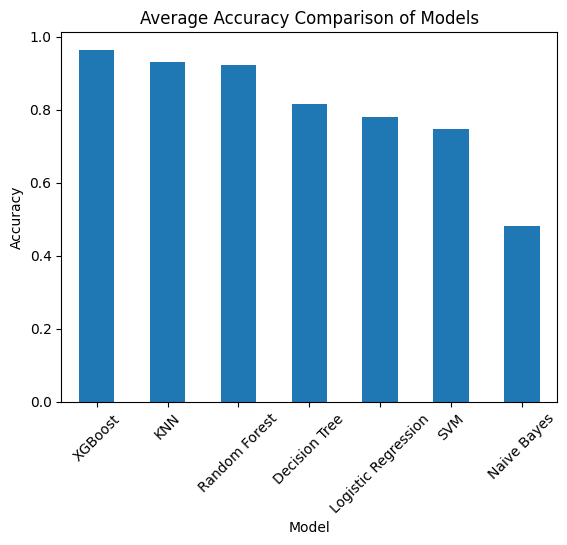

In [123]:
# ================= ACCURACY BAR PLOT =================

import matplotlib.pyplot as plt

avg_accuracy = average_df["Accuracy"].sort_values(ascending=False)

plt.figure()
avg_accuracy.plot(kind='bar')
plt.title("Average Accuracy Comparison of Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()